In [21]:
import matplotlib.pyplot as plt
from sklearn import linear_model # usando sklear para saber los valores optimos
import seaborn as sns
import numpy as np
import pandas as pd


In [22]:
data = pd.read_csv("C:/Users/adm_usu/Downloads/cars.csv", sep=",")

In [23]:
data.groupby(['year']).count()['priceUSD']

year
1910       1
1933       1
1936       1
1938       1
1942       1
        ... 
2015    1989
2016    1417
2017     622
2018     570
2019     224
Name: priceUSD, Length: 78, dtype: int64

In [24]:
data

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B
...,...,...,...,...,...,...,...,...,...,...,...,...
56239,lancia,zeta,3650,2000,with mileage,290000.0,petrol,2000.0,other,mechanics,front-wheel drive,M
56240,lancia,zeta,4100,1999,with mileage,340000.0,diesel,2100.0,blue,mechanics,front-wheel drive,M
56241,lancia,zeta,3600,1997,with mileage,354000.0,diesel,2100.0,burgundy,mechanics,front-wheel drive,M
56242,lancia,zeta,3000,1997,with mileage,350000.0,petrol,2000.0,blue,mechanics,front-wheel drive,M


array([[<Axes: title={'center': 'priceUSD'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'mileage(kilometers)'}>,
        <Axes: title={'center': 'volume(cm3)'}>]], dtype=object)

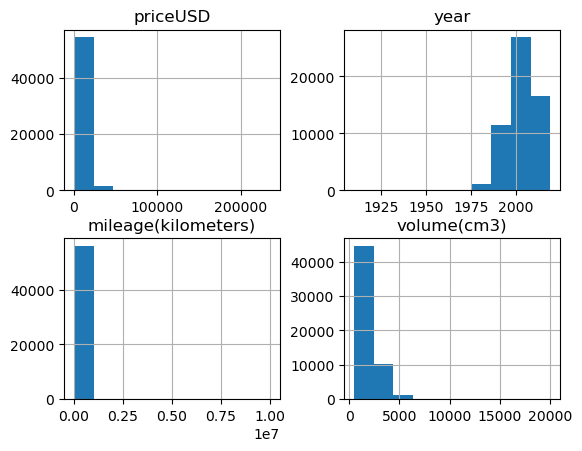

In [25]:
data.hist()

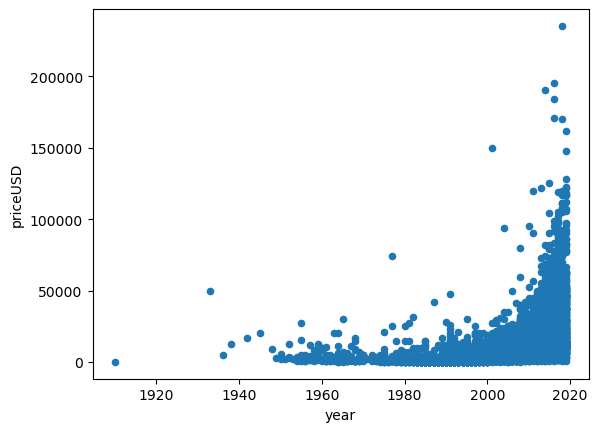

In [26]:
#Realizo la grafica de dispersión
data.plot.scatter(x="year", y="priceUSD")
plt.show()


In [27]:
cantidad_año = data.groupby(['year', "priceUSD"]).count()['make']

In [28]:
cantidad_año

year  priceUSD
1910  48          1
1933  50000       1
1936  4991        1
1938  12500       1
1942  17000       1
                 ..
2019  121451      1
      122290      1
      128136      1
      148000      1
      161563      1
Name: make, Length: 12689, dtype: int64

In [29]:
cantidad_año1 = data.groupby(['year']).count()['priceUSD']

Text(0, 0.5, 'Precio USD')

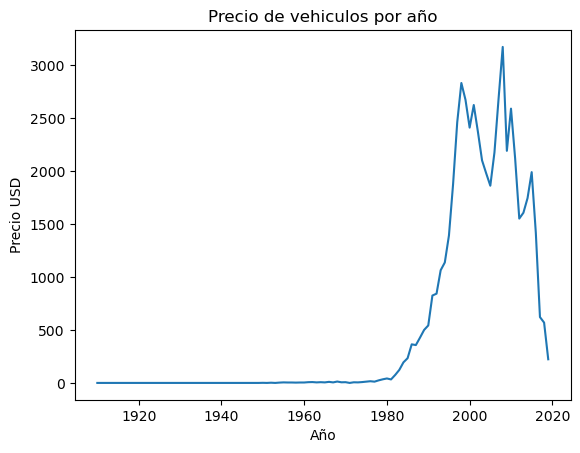

In [30]:
plt.plot(cantidad_año1)
plt.title("Precio de vehiculos por año")
plt.xlabel("Año")
plt.ylabel("Precio USD")

In [42]:
regresion = linear_model.LinearRegression()

In [50]:
#Agrego los datos en un array o vector
years = data["year"].values.reshape((-1,1))

In [44]:
#Ahora si creamos el modelo
modelo = regresion.fit(years, data["priceUSD"])

In [45]:
print("Interseccion (b)", modelo.intercept_)
#imprimos la pendiente
print("Pendiente (m)", modelo.coef_)

Interseccion (b) -1230646.5307858826
Pendiente (m) [617.9635112]


In [60]:
entrada = [[1980],[1990],[2000],[2010],[2019]]
predicciones = modelo.predict(entrada)
print(predicciones)

[-7078.77861093  -899.14349894  5280.49161306 11460.12672505
 17021.79832585]


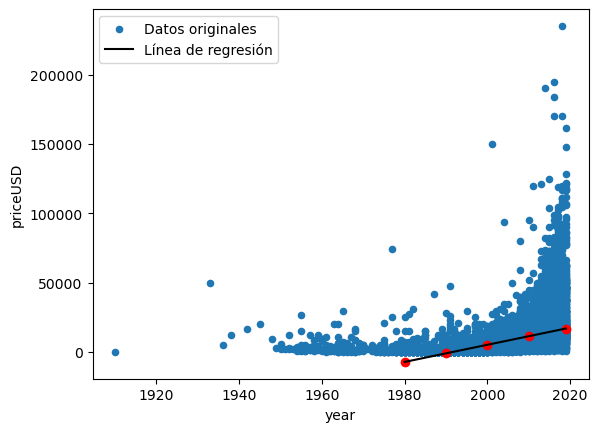

In [61]:
data.plot.scatter(x="year", y="priceUSD", label='Datos originales')
plt.scatter(entrada, predicciones, color='red')
plt.plot(entrada, predicciones, color='black', label='Línea de regresión')
plt.xlabel('year')
plt.ylabel('priceUSD')
plt.legend()
plt.show()

In [31]:
data['priceUSD'].min()

48

In [32]:
# Prueba de parametros
w = 125
b = 0

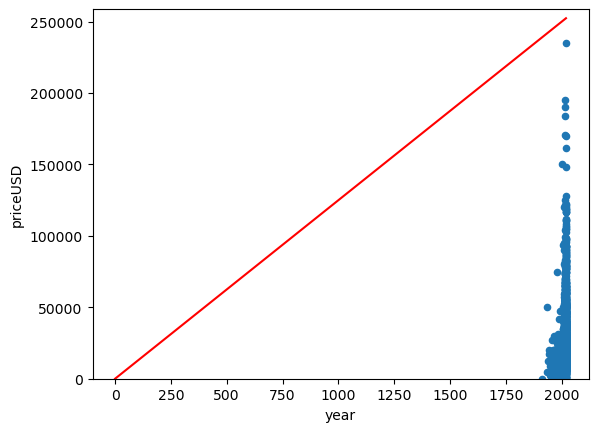

In [33]:
# puntos de la recta
x = np.linspace(0,data['year'].max(),100)
y = w*x+b


#Grafica de la recta
data.plot.scatter(x='year',y='priceUSD')
plt.plot(x, y, '-r')
plt.ylim(0,data['priceUSD'].max()*1.1)
# plt.grid()
plt.show()

In [34]:
#Calculo de Predicicones
data['pred'] = data['year']*w+b

In [35]:
#Calculo de la funcion de Error
data['diff'] = data['pred']-data['priceUSD']
data['cuad'] = data['diff']**2
data.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,pred,diff,cuad
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B,251000,245500,60270250000
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B,251125,245775,60405350625
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B,251125,244125,59597015625
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B,250375,247075,61046055625
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B,251000,245800,60417640000


In [36]:
data['cuad'].mean()

59116929890.695076

In [37]:
# grid de la funcion de error basado en m, b=0
w = np.linspace(50,200,50)
grid_error = pd.DataFrame(w, columns=['w'])
grid_error.head()

,w
0,50.000000
1,53.061224
2,56.122449
3,59.183673
4,62.244898


In [38]:
def sum_error(w, data):
    b = 0
    data['pred'] = data['year']*w+b
    data['diff'] = data['pred']-data['priceUSD']
    data['cuad'] = data['diff']**2
    return(data['cuad'].mean())

In [39]:
grid_error['error']=grid_error['w'].apply(lambda x: sum_error(x, data=data))
grid_error.head()

,w,error
0,50.000000,8.669152e+09
1,53.061224,9.844301e+09
2,56.122449,1.109468e+10
3,59.183673,1.242029e+10
4,62.244898,1.382112e+10


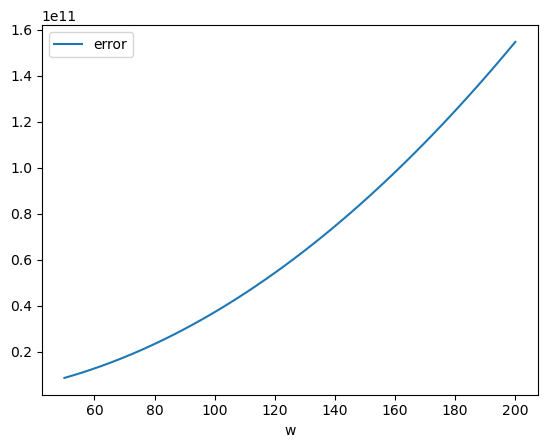

In [40]:
grid_error.plot(x='w',y='error')
plt.show()